# Application : dataset of Cats vs. Dogs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tqdm import tqdm
#import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
!pip install h5py
#datasets contain training and test sets with cat and dog images

In [3]:
from utilities import *
#contain functions to open the training and test datasets

X_train, y_train, X_test, y_test = load_data()
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True)) #500 cats (0) and 500 dogs (1)


(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500]))


In [4]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100]))


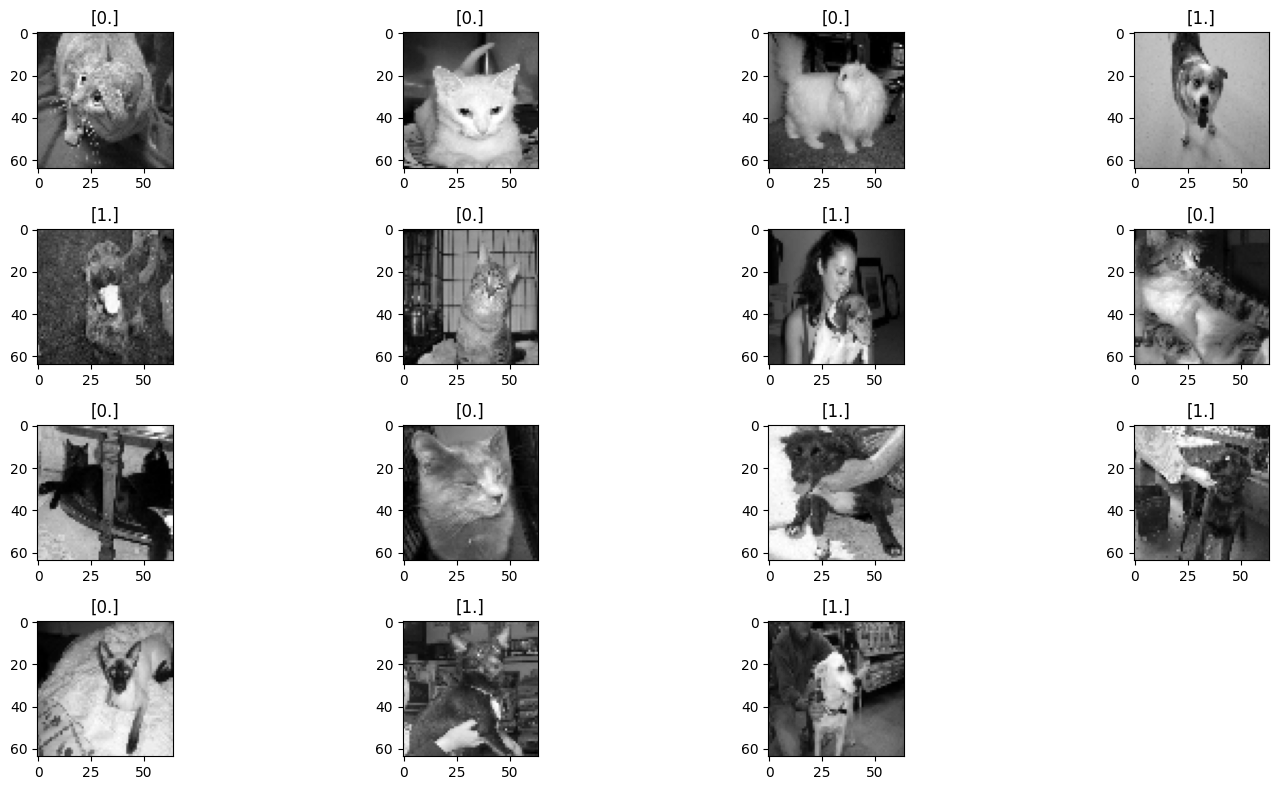

In [5]:
# Observe the first images of the dataset
plt.figure(figsize=(16, 8))
for i in range(1, 16):
    plt.subplot(4, 4, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [6]:
y_train=y_train.T
y_test=y_test.T

X_train=X_train.T
X_train_reshape = X_train.reshape(-1,X_train.shape[-1]) / X_train.max()

X_test=X_test.T
X_test_reshape = X_test.reshape(-1,X_test.shape[-1]) / X_train.max()

#m_train=300
#m_test=80
#X_test_reshape=X_test_reshape[:,:m_test]
#X_train_reshape=X_train_reshape[:,:m_train]
#y_train=y_train[:, :m_train]
#y_test=y_test[:, :m_test]

print(X_train_reshape.shape)
print(X_test_reshape.shape)
print(y_train.shape)
print(y_test.shape)

(4096, 1000)
(4096, 200)
(1, 1000)
(1, 200)


# Fundamental functions

In [7]:
def initialisation(n0, n1, n2):

    W1 = np.random.randn(n1, n0)
    b1 = np.zeros((n1, 1))
    W2 = np.random.randn(n2, n1)
    b2 = np.zeros((n2, 1))

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

In [8]:
def forward_propagation(X, parametres):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))

    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    activations = {
        'A1': A1,
        'A2': A2
    }

    return activations

In [9]:
def back_propagation(X, y, parametres, activations):

    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']

    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims = True)

    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }
    
    return gradients

In [10]:
def update(gradients, parametres, learning_rate):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

In [11]:
def predict(X, parametres):
  activations = forward_propagation(X, parametres)
  A2 = activations['A2']
  return A2 >= 0.5

In [19]:
def neural_network(X_train, y_train, X_test, y_test, n1=2, learning_rate = 0.1, n_iter = 10000):

    # initialisation parametres
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    np.random.seed(0)
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []

    # gradient descent
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X_train, parametres)
        A2 = activations['A2']
        if i %10 == 0: #if iteration multiple of 10, do
            # Plot Training Curve
            train_loss.append(log_loss(y_train.flatten(), A2.flatten()))
            y_pred = predict(X_train, parametres)
            train_acc.append(accuracy_score(y_train.flatten(), y_pred.flatten()))
            # Update
            gradients = back_propagation(X_train, y_train, parametres, activations)
            parametres = update(gradients, parametres, learning_rate)
        
            # Test
            activations = forward_propagation(X_test, parametres)
            A2_test = activations['A2']
            test_loss.append(log_loss(y_test.flatten(), A2_test.flatten()))
            y_pred = predict(X_test, parametres)
            test_acc.append(accuracy_score(y_test.flatten(), y_pred.flatten()))
            
         

        
        

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='Test loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.plot(test_acc, label='Test acc')
    plt.legend()
    plt.show()
    print(train_loss[-1])
    print(train_acc[-1])
    
    return parametres

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:48<00:00, 207.22it/s]


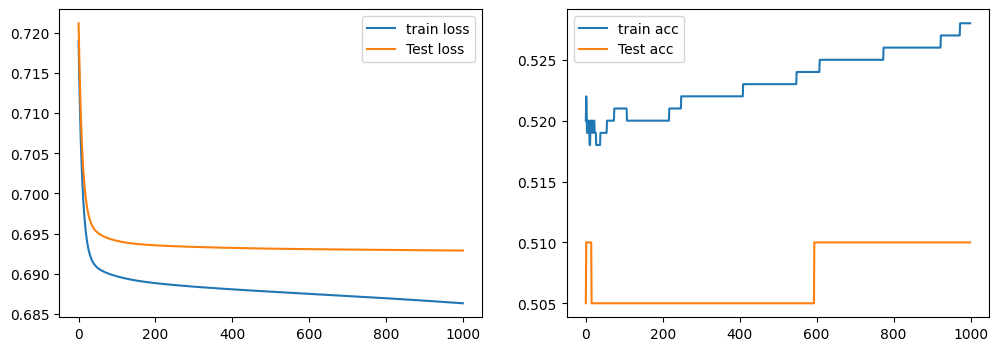

0.6863224696244465
0.528


{'W1': array([[ 1.76278284,  0.39883843,  0.97737796, ...,  0.46375957,
          0.61749405,  2.49613766],
        [ 1.62669966, -0.10225564, -0.20500044, ...,  0.66254809,
          0.52921022, -1.05318106],
        [-0.53150404, -1.98088375, -0.09256301, ...,  0.50861674,
         -0.15588703,  0.69032424],
        [-0.11047888,  0.20958655, -0.26863263, ..., -0.87641651,
         -0.77009343,  0.96570311]]),
 'b1': array([[-0.00189836],
        [-0.0076458 ],
        [ 0.01116612],
        [-0.0002758 ]]),
 'W2': array([[ 0.27999416,  0.00874829, -0.9479804 ,  0.31689864]]),
 'b2': array([[-0.25915812]])}

In [21]:
from sklearn.metrics import log_loss

neural_network(X_train_reshape, y_train, X_test_reshape, y_test, n1=4, learning_rate=0.1,n_iter=10000)

100%|██████████| 10000/10000 [01:04<00:00, 155.44it/s]


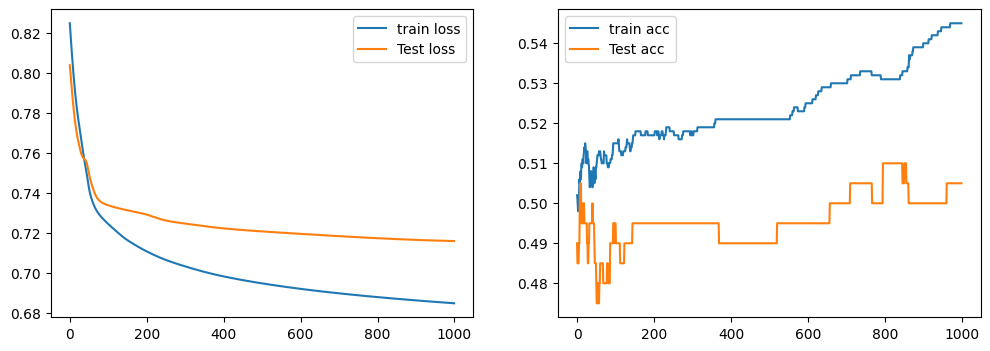

0.6848628152597572
0.545


{'W1': array([[ 1.77148353,  0.40801964,  0.98699103, ...,  0.46517287,
          0.6189873 ,  2.49796552],
        [ 1.61967478, -0.11715426, -0.21681579, ...,  0.675444  ,
          0.54317369, -1.03965361],
        [-0.53937083, -1.98972849, -0.10562527, ...,  0.49825753,
         -0.17048332,  0.67994646],
        ...,
        [ 0.22169644, -1.98813084,  0.01136924, ...,  0.09873093,
         -0.36922624, -1.06196481],
        [-0.30528935,  0.79823683,  0.85661175, ..., -2.72034837,
          0.71449462, -1.37630327],
        [-1.20555441,  0.77782318, -1.19864463, ..., -0.07131198,
          2.36884873, -0.47797976]]),
 'b1': array([[ 0.0132072 ],
        [-0.0056322 ],
        [-0.0403253 ],
        [ 0.00041549],
        [-0.03852328],
        [ 0.01011103],
        [-0.02357424],
        [-0.00478442]]),
 'W2': array([[-1.28992677, -1.09005947,  0.75505734, -0.3904468 ,  0.97602429,
         -0.13754238,  1.48105702, -0.28765704]]),
 'b2': array([[-0.31680381]])}

In [22]:
neural_network(X_train_reshape, y_train, X_test_reshape, y_test, n1=8, learning_rate=0.1,n_iter=10000)

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [02:07<00:00, 78.15it/s]


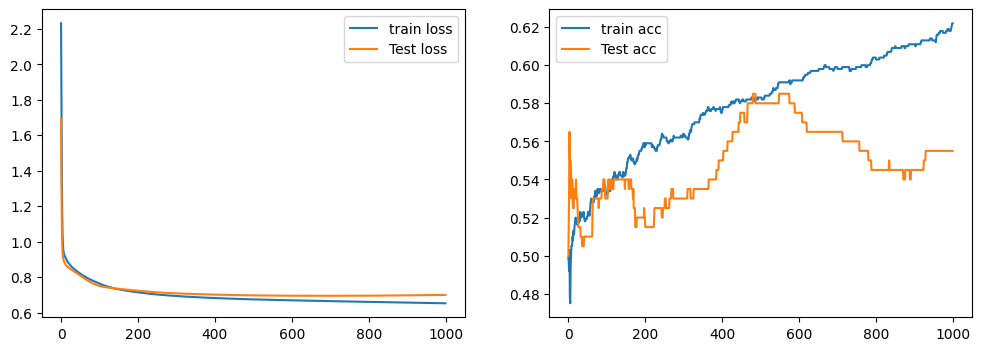

0.6522736969923035
0.622


{'W1': array([[ 1.76299375,  0.39906285,  0.97762107, ...,  0.46380035,
          0.61755802,  2.49625842],
        [ 1.63441183, -0.09405604, -0.19697421, ...,  0.6715968 ,
          0.5380829 , -1.04504454],
        [-0.53100179, -1.98080469, -0.09425327, ...,  0.50887986,
         -0.15767407,  0.69125772],
        ...,
        [-1.12526205,  0.41807776, -0.42694531, ...,  1.00595444,
          0.40620356,  2.60630047],
        [-0.7620165 , -0.14139029, -1.29774801, ..., -0.90315217,
          0.38962592, -0.37517178],
        [-1.85426737, -0.49887843, -0.58718788, ...,  1.35379688,
         -0.3752819 ,  2.61384634]]),
 'b1': array([[-0.00135369],
        [ 0.00865682],
        [ 0.00256194],
        [ 0.00106852],
        [-0.02563464],
        [ 0.01267314],
        [-0.01993779],
        [-0.00307585],
        [ 0.01594104],
        [ 0.02101964],
        [-0.01323343],
        [ 0.0005492 ],
        [ 0.04214911],
        [-0.02108281],
        [ 0.00753771],
        [ 0.0026

In [25]:
neural_network(X_train_reshape, y_train, X_test_reshape, y_test, n1=32, learning_rate=0.1,n_iter=10000)

  0%|          | 0/40000 [00:00<?, ?it/s]

100%|██████████| 40000/40000 [06:41<00:00, 99.57it/s] 


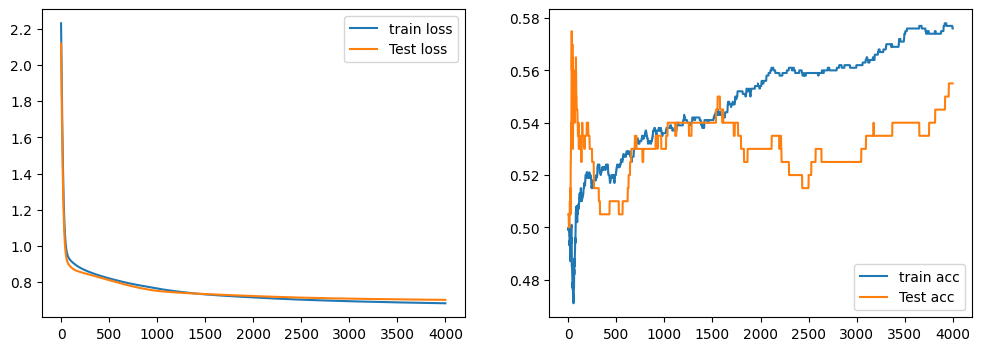

0.6817025795497311
0.576


{'W1': array([[ 1.76364521,  0.399737  ,  0.97831057, ...,  0.46384575,
          0.61762412,  2.49636408],
        [ 1.63014792, -0.09829256, -0.20132853, ...,  0.66694665,
          0.53294427, -1.05012351],
        [-0.5295458 , -1.97948153, -0.09398623, ...,  0.5087858 ,
         -0.15845972,  0.69112611],
        ...,
        [-1.12472729,  0.41817367, -0.42641507, ...,  1.00608544,
          0.40628525,  2.60637914],
        [-0.76320526, -0.14088119, -1.29724724, ..., -0.90511122,
          0.38807339, -0.37735542],
        [-1.85473118, -0.49931042, -0.5875161 , ...,  1.35349505,
         -0.37556117,  2.61363051]]),
 'b1': array([[-5.10510266e-04],
        [ 1.20629432e-03],
        [ 1.00761901e-03],
        [ 4.94044573e-04],
        [-1.84477215e-02],
        [ 1.10682279e-02],
        [-1.85528376e-02],
        [-1.18482847e-03],
        [ 4.90641051e-03],
        [ 1.93817771e-02],
        [-8.86032647e-03],
        [-1.01979266e-03],
        [ 3.16152796e-02],
        [-

In [28]:
neural_network(X_train_reshape, y_train, X_test_reshape, y_test, n1=32, learning_rate=0.01,n_iter=40000)